In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.CMS])

In [5]:
def quotient(a, b): # quotient uncertainty
    y = a / b
    uy = y * (1. / a + 1. / b) ** 0.5
    return y, uy

In [6]:
## DATA EXTRACTED FROM ANALYSIS IN efficiencies.ipynb ## 


Nevents     =   {
                "Ntot" :
                    {"QCD" : 21335910, "Z" : 459000, "H" : 448000},
                "kin and HLT" :
                    {"HLT_Mu17_Photon30"                : {"QCD" : 26, "Z" : 81829, "H" : 142102}},
                "kin" :
                    {"Mu18 Ph32"                        : {"QCD" : 34,  "Z" : 98630,    "H" : 160587},
                    "Mu18 Ph24 dR04"                    : {"QCD" : 29,  "Z" : 113505,   "H" : 168665},
                    "Mu20, Ph26.3 dR035"                : {"QCD" : 18,  "Z" : 102523,   "H" : 164061},
                    "Mu15, Ph20 2mumuM4"                : {"QCD" : 28,  "Z" : 125836,   "H" : 173615},
                    "Mu17.5, Ph23.5 2.25mumuM3.5"       : {"QCD" : 5,   "Z" : 115324,   "H" : 168506},
                    "Mu15, Ph23.5 2.7mumuM3.5"          : {"QCD" : 10,  "Z" : 120744,   "H" : 168785}}

                ## NOT USED FOR NOW ##
                #"HLT" :
                #    {"HLT_Mu17_Photon30"  : {"QCD" : 34, "Z" : 87263, "H" : 144804}},

                } 



efficiency  =   {
                "trigger" : 
                    {"HLT_Mu17_Photon30"  : {"QCD" : None, "Z" : None, "H" : None}},
                "selection" :
                    {"Mu18 Ph32"                    : {"QCD" : None, "Z" : None, "H" : None}, # must have the same names as Nevents["kin"]
                    "Mu18 Ph24 dR04"                : {"QCD" : None, "Z" : None, "H" : None},
                    "Mu20, Ph26.3 dR035"            : {"QCD" : None, "Z" : None, "H" : None},
                    "Mu15, Ph20 2mumuM4"            : {"QCD" : None, "Z" : None, "H" : None},
                    "Mu17.5, Ph23.5 2.25mumuM3.5"   : {"QCD" : None, "Z" : None, "H" : None},
                    "Mu15, Ph23.5 2.7mumuM3.5"      : {"QCD" : None, "Z" : None, "H" : None}}

                }

_labels = ["HLT_Mu17_Photon30"]

In [7]:
for (kin, kinAndHLT) in zip(Nevents["kin"], Nevents["kin and HLT"]):
    for type in ("trigger", "selection"):
        for nature in ("QCD", "Z", "H"):
            if type == "trigger":
                efficiency[type][kinAndHLT][nature] = quotient(Nevents["kin and HLT"][kinAndHLT][nature], Nevents["kin"][kin][nature])
            elif type == "selection":
                for kin in Nevents["kin"]:
                    efficiency[type][kin][nature] = quotient(Nevents["kin"][kin][nature], Nevents["Ntot"][nature])

In [8]:
efficiency

{'trigger': {'HLT_Mu17_Photon30': {'QCD': (0.7647058823529411,
    0.1992250404219347),
   'Z': (0.8296562911892933, 0.003923099701946281),
   'H': (0.8848910559385256, 0.003222796157039465)}},
 'selection': {'Mu18 Ph32': {'QCD': (1.5935575281298056e-06,
    2.73293079171317e-07),
   'Z': (0.214880174291939, 0.0007541514205596815),
   'H': (0.358453125, 0.0010425562761256515)},
  'Mu18 Ph24 dR04': {'QCD': (1.3592108328165988e-06, 2.5239928678553816e-07),
   'Z': (0.2472875816993464, 0.000819743742521512),
   'H': (0.376484375, 0.0010755240205558984)},
  'Mu20, Ph26.3 dR035': {'QCD': (8.436481031275442e-07, 1.988498487651472e-07),
   'Z': (0.2233616557734205, 0.00077157011782297),
   'H': (0.3662075892857143, 0.0010567761662161573)},
  'Mu15, Ph20 2mumuM4': {'QCD': (1.3123414937539576e-06, 2.48009393283777e-07),
   'Z': (0.2741525054466231, 0.0008723694996876999),
   'H': (0.38753348214285716, 0.0010955629687889935)},
  'Mu17.5, Ph23.5 2.25mumuM3.5': {'QCD': (2.343466953132067e-07,
    

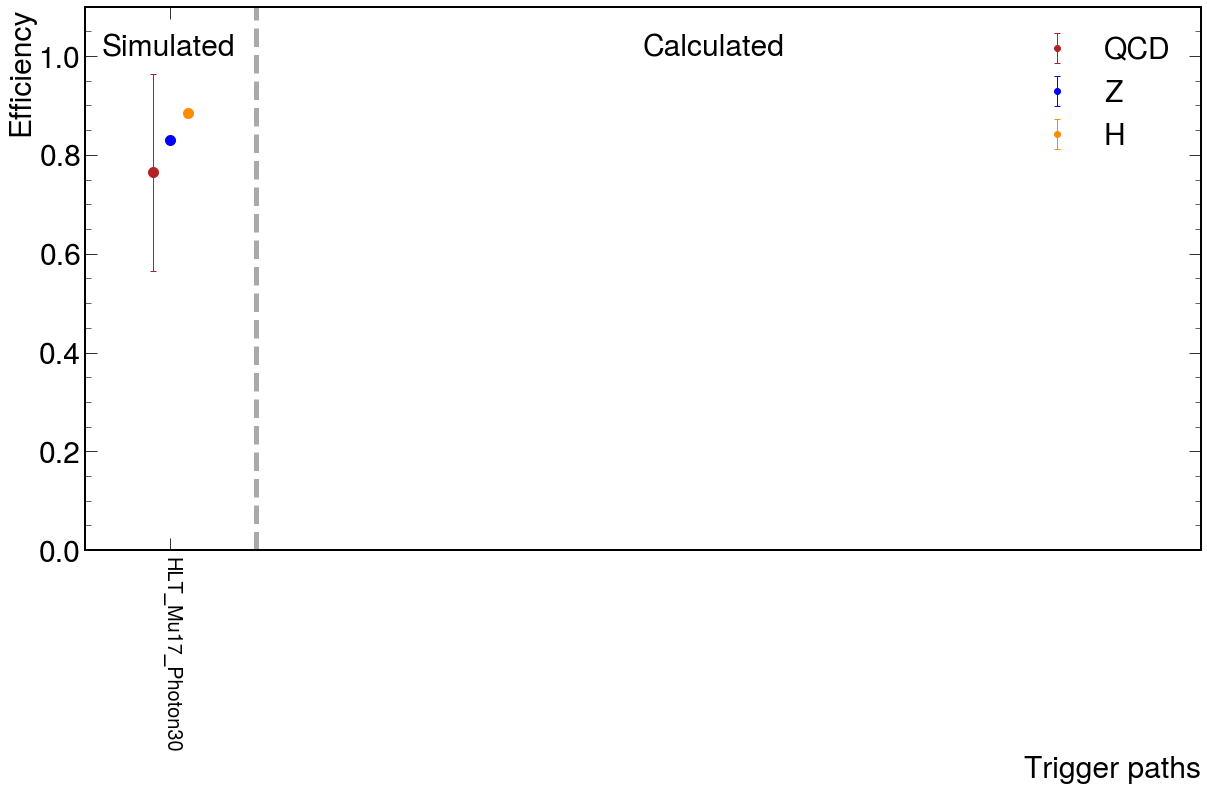

In [214]:
fig, ax = plt.subplots(figsize=(20, 10))
_x = np.arange(len(_labels))
_x

for i, HLT in enumerate(efficiency["trigger"]):

    # QCD
    ax.plot(i - 0.1, efficiency["trigger"][HLT]["QCD"][0], marker = 'o', markersize = 10, c = "firebrick", lw = 0)
    ax.errorbar(i - 0.1, efficiency["trigger"][HLT]["QCD"][0], yerr = efficiency["trigger"][HLT]["QCD"][1] if efficiency["trigger"][HLT]["QCD"][1] + efficiency["trigger"][HLT]["QCD"][0] <= 1. else 1. - efficiency["trigger"][HLT]["QCD"][0], fmt = "o", capsize = 3., elinewidth = 1., lw = 0, color = "firebrick", label = "QCD")

    # Z
    ax.plot(i, efficiency["trigger"][HLT]["Z"][0], marker = 'o', markersize = 10, c = "blue", lw = 0)
    ax.errorbar(i, efficiency["trigger"][HLT]["Z"][0], yerr = efficiency["trigger"][HLT]["Z"][1] if efficiency["trigger"][HLT]["Z"][1] + efficiency["trigger"][HLT]["Z"][0] <= 1. else 1. - efficiency["trigger"][HLT]["Z"][0], fmt = "o", capsize = 3., elinewidth = 1., lw = 0, color = "blue", label = "Z")

    # H 
    ax.plot(i + 0.1, efficiency["trigger"][HLT]["H"][0], marker = 'o', markersize = 10, c = "darkorange", lw = 0)
    ax.errorbar(i + 0.1, efficiency["trigger"][HLT]["H"][0], yerr = efficiency["trigger"][HLT]["H"][1] if efficiency["trigger"][HLT]["H"][1] + efficiency["trigger"][HLT]["H"][0] <= 1. else 1. - efficiency["trigger"][HLT]["H"][0], fmt = "o", capsize = 3., elinewidth = 1., lw = 0, color = "darkorange", label = "H")

ax.axvline(x = 0.5, linestyle = "dashed", color = "darkgrey", lw = 5.)

ax.text(x = -0.4, y = 1.001, s = "Simulated", fontsize = 30)
ax.text(x = (6 - 0.5) / 2, y = 1.001, s = "Calculated", fontsize = 30)

ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Trigger paths", fontsize = 30)
ax.set_ylabel("Efficiency", fontsize = 30)
ax.set_xlim(-0.5, 6)
ax.set_ylim(0., 1.1)
ax.legend(loc = "best", fontsize = 30)
ax.set_xticks(_x, _labels, rotation = 270, fontsize = 20)